# Time Series Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
df = pd.read_pickle("/Users/Shruti/Documents/Data Science/Final Project/Crazy Taxi/data/interim/Preprocessed2.pkl")

In [3]:
df = shuffle(df)

In [4]:
df.head()

Unnamed: 0  month  Hour  Day  Weekend_Trip  RatecodeID  PULocationID  \
484964       680768      8    17    5             0           1           196   
1491434     2270021      1    17    5             0           1            41   
1691954      999479      7     0    5             0           1           223   
2072263     1546850      4    18    2             0           1            74   
1061726     1892465      2    20    5             0           1           173   

         DOLocationID  trip_distance  fare_amount  trip_duration  Airport  
484964            196            1.4          8.0       9.266667        0  
1491434            75            0.9          6.0       6.500000        0  
1691954           129            3.5         12.5      11.333333        0  
2072263           151            2.3         11.5      14.483333        0  
1061726           196            2.0         10.0      12.133333        0

In [5]:
df_1 = df[['Day','month','Hour','fare_amount']]

In [6]:
df_1.head()

Day  month  Hour  fare_amount
484964     5      8    17          8.0
1491434    5      1    17          6.0
1691954    5      7     0         12.5
2072263    2      4    18         11.5
1061726    5      2    20         10.0

In [7]:
# monthwise aggregation
total_fare = (df_1.groupby(['month'])["fare_amount"].sum().reset_index())
# daywise aggregation 
day_fare = (df_1.groupby(['Day'])["fare_amount"].sum().reset_index())

In [8]:
# monthwise aggregation of fare amount
total_fare.head()

month  fare_amount
0      1   2391973.86
1      2   2319380.37
2      3   2633115.66
3      4   2462175.04
4      5   2479153.05

In [9]:
day_fare.head()

Day  fare_amount
0    0   3127433.86
1    1   3235273.40
2    2   3458808.22
3    3   3624915.77
4    4   4183840.52

__PLOTLY__

In [10]:
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [11]:
# Visualizing time series monthwise
trace = go.Scatter(x = total_fare.index,y = total_fare.fare_amount,
                   mode = "lines+markers",
                   marker = dict(color = "royalblue",line = dict(width =1))
                  )
layout = go.Layout(dict(title = "Visualizing time series monthwise fare",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b = 100)
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)

In [12]:
py.iplot(fig)

In [13]:
# Visualizing time series daywise
trace = go.Scatter(x = day_fare.index,y = day_fare.fare_amount,
                   mode = "lines+markers",
                   marker = dict(color = "royalblue",line = dict(width =1))
                  )
layout = go.Layout(dict(title = "Visualizing time series daywise fare",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b = 100)
                       )
                  )
fig1 = go.Figure(data = [trace],layout = layout)

In [14]:
py.iplot(fig1)

In [15]:
# Visualization using Bokeh

from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.resources import INLINE
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar

In [16]:
df_2 = (df_1.groupby(['month'])["fare_amount"].count().reset_index())

In [17]:
df_2.head()

month  fare_amount
0      1       212320
1      2       202463
2      3       232064
3      4       213473
4      5       211993

__BAR CHART__

In [18]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom,tap"
p = figure(plot_height=350,
    title="Number of Rides by Month",
    tools=TOOLS,
    toolbar_location='above')

p.vbar(x=df_2.month, top=df_2.fare_amount, width=0.9)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Ride Count'
p.select_one(HoverTool).tooltips = [
    ('Month', '@x'),
    ('Number of Rides', '@top'),
]
output_notebook(resources=INLINE)
output_file("barchart1.html", title="barchart")
show(p)

Loading BokehJS ...

__LINE CHART__ (Line chart is used primarily to show trend, i.e. whether there is an increase or decrese over a given x-axis)

In [19]:
df_3 = (df_1.groupby(['month'])["fare_amount"].sum().reset_index())

In [20]:
df_3

month  fare_amount
0       1   2391973.86
1       2   2319380.37
2       3   2633115.66
3       4   2462175.04
4       5   2479153.05
5       6   2296112.57
6       7   2012276.12
7       8   1895909.01
8       9   1897886.10
9      10   1978501.83
10     11   1785038.37
11     12   1759456.86

In [21]:
TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Monthwise total fare amount", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Total Fare Amount'

p.line(df_3.month, df_3.fare_amount,line_color="purple", line_width = 3)
p.select_one(HoverTool).tooltips = [
    ('month', '@x'),
    ('Total Fare Amount', '@y'),
]

output_notebook(resources=INLINE)
output_file("line_chart1.html", title="Line Chart")
show(p)

Loading BokehJS ...

In [22]:
df.head()

Unnamed: 0  month  Hour  Day  Weekend_Trip  RatecodeID  PULocationID  \
484964       680768      8    17    5             0           1           196   
1491434     2270021      1    17    5             0           1            41   
1691954      999479      7     0    5             0           1           223   
2072263     1546850      4    18    2             0           1            74   
1061726     1892465      2    20    5             0           1           173   

         DOLocationID  trip_distance  fare_amount  trip_duration  Airport  
484964            196            1.4          8.0       9.266667        0  
1491434            75            0.9          6.0       6.500000        0  
1691954           129            3.5         12.5      11.333333        0  
2072263           151            2.3         11.5      14.483333        0  
1061726           196            2.0         10.0      12.133333        0

In [25]:
df.shape

(2249712, 12)

Text(0,0.5,'Trip Distance')

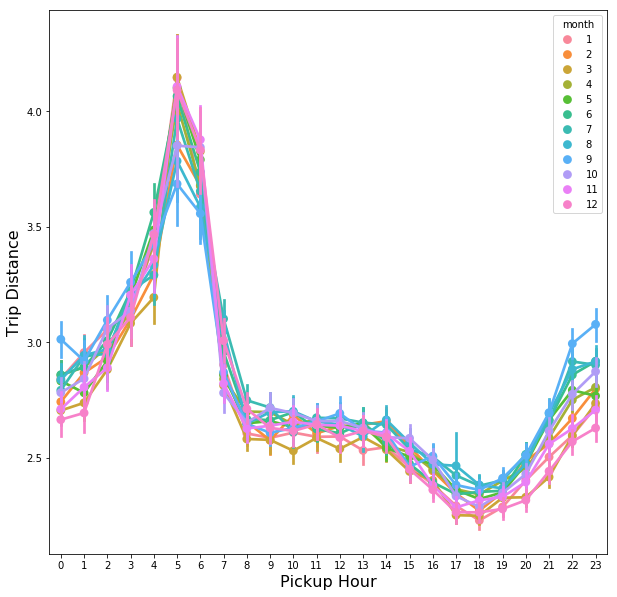

In [23]:
plt.figure(figsize=(10,10))
sns.pointplot(x='Hour',y='trip_distance',data=df,kind='point',hue='month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Distance',fontsize=16)

Text(0,0.5,'Trip Duration')

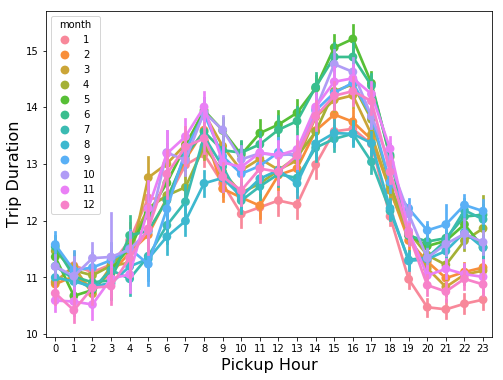

In [26]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Hour',y='trip_duration',data=df,kind='point',hue='month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration',fontsize=16)

Text(0,0.5,'Trip Distance')

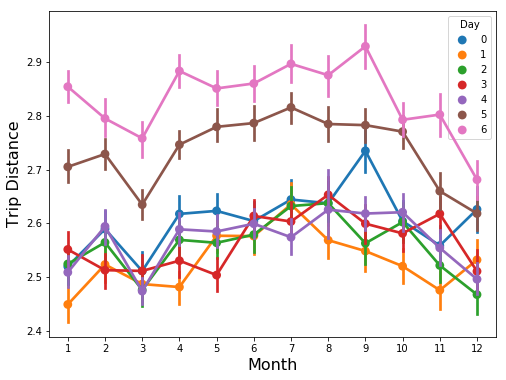

In [32]:
plt.figure(figsize=(8,6))
sns.pointplot(x='month',y='trip_distance',data=df,kind='point',hue='Day')
plt.xlabel('Month',fontsize=16)
plt.ylabel('Trip Distance',fontsize=16)

In [41]:
# Trips for JFK airport Location ID - 132
df_JFK = df[(df.PULocationID == 132) | (df.DOLocationID == 132)]

In [42]:
df_JFK.head()

Unnamed: 0  month  Hour  Day  Weekend_Trip  RatecodeID  PULocationID  \
1782105      296125     11    10    5             0           1           210   
1259445      279834     11    14    1             0           2           244   
1510301      426521     10    11    3             0           1            66   
666830      2027687      2    13    1             0           2            41   
1105483     1694500      3    22    3             0           1           255   

         DOLocationID  trip_distance  fare_amount  trip_duration  Airport  
1782105           132           12.6         40.5      36.983333        1  
1259445           132           21.6         52.0      42.700000        1  
1510301           132           18.1         49.0      36.600000        1  
666830            132           17.2         52.0      29.250000        1  
1105483           132           15.5         45.5      38.183333        1

In [43]:
df_JFK.shape

(12863, 12)

In [58]:
# Regions with most pickups and dropoffs

df_PickupCount = df['PULocationID'].value_counts().sort_values(ascending=False)
df_DropOffCount = df['DOLocationID'].value_counts().sort_values(ascending=False)

In [59]:
df_PUTop10 = df_PickupCount.head(10)
df_DOTop10 = df_DropOffCount.head(10)

In [60]:
df_PUTop10

74     155556
41     130789
75     122105
82     104228
255     91137
97      86700
42      84051
7       83995
166     82795
129     77103
Name: PULocationID, dtype: int64

In [61]:
df_DOTop10

42     80308
74     77935
41     69933
129    63287
181    60141
7      54916
75     51356
82     45950
97     45944
61     44489
Name: DOLocationID, dtype: int64

- __Top 3 Pickup Locations: 1. Manhattan - East Harlem North 2. Manhattan - Central Harlem 3. Manhattan	East Harlem South__
- __Top 3 DropOff Locations 1. Manhattan - Central Harlem North 2. Manhattan - East Harlem North 3. Manhattan - Central Harlem__

In [63]:
df_zones = pd.read_csv("/Users/Shruti/Documents/Data Science/Final Project/Crazy Taxi/data/raw/taxi_zone_lookup.csv")

In [64]:
df_zones.head()

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

In [68]:
df.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

In [70]:
df.head()

Unnamed: 0  month  Hour  Day  Weekend_Trip  RatecodeID  LocationID  \
484964       680768      8    17    5             0           1         196   
1491434     2270021      1    17    5             0           1          41   
1691954      999479      7     0    5             0           1         223   
2072263     1546850      4    18    2             0           1          74   
1061726     1892465      2    20    5             0           1         173   

         DOLocationID  trip_distance  fare_amount  trip_duration  Airport  
484964            196            1.4          8.0       9.266667        0  
1491434            75            0.9          6.0       6.500000        0  
1691954           129            3.5         12.5      11.333333        0  
2072263           151            2.3         11.5      14.483333        0  
1061726           196            2.0         10.0      12.133333        0

In [71]:
df_merge1 = pd.merge(df, df_zones, on='LocationID')

In [72]:
df_merge1.head()

Unnamed: 0  month  Hour  Day  Weekend_Trip  RatecodeID  LocationID  \
0      680768      8    17    5             0           1         196   
1      902724      7    15    0             0           1         196   
2      300355     11    19    4             0           1         196   
3      993539      7    19    5             0           1         196   
4     1477414      4    15    5             0           1         196   

   DOLocationID  trip_distance  fare_amount  trip_duration  Airport Borough  \
0           196            1.4          8.0       9.266667        0  Queens   
1            82            1.2          8.0      10.133333        0  Queens   
2           260            2.8         12.5      14.750000        0  Queens   
3            83            1.8          8.5       9.366667        0  Queens   
4            56            0.7          7.5       9.883333        0  Queens   

        Zone service_zone  
0  Rego Park    Boro Zone  
1  Rego Park    Boro Zone  
2  Rego Park    Boro Zone  
3  Rego Park    Boro Zone  
4  Rego Park    Boro Zone

In [73]:
df_merge1.shape

(2249712, 15)

In [75]:
df_merge1.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

In [76]:
df_merge1.head()

Unnamed: 0  month  Hour  Day  Weekend_Trip  RatecodeID  PULocationID  \
0      680768      8    17    5             0           1           196   
1      902724      7    15    0             0           1           196   
2      300355     11    19    4             0           1           196   
3      993539      7    19    5             0           1           196   
4     1477414      4    15    5             0           1           196   

   DOLocationID  trip_distance  fare_amount  trip_duration  Airport Borough  \
0           196            1.4          8.0       9.266667        0  Queens   
1            82            1.2          8.0      10.133333        0  Queens   
2           260            2.8         12.5      14.750000        0  Queens   
3            83            1.8          8.5       9.366667        0  Queens   
4            56            0.7          7.5       9.883333        0  Queens   

        Zone service_zone  
0  Rego Park    Boro Zone  
1  Rego Park    Boro Zone  
2  Rego Park    Boro Zone  
3  Rego Park    Boro Zone  
4  Rego Park    Boro Zone

In [82]:
df_borough = df_merge1.groupby('Borough')

In [88]:
df_borough.size().sort_values(ascending=False)

Borough
Brooklyn         888249
Manhattan        740404
Queens           539969
Bronx             76164
Unknown            4804
Staten Island        97
EWR                  25
dtype: int64